In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/300/'

os.chdir(current_path)

Mounted at /content/drive


### requirements

In [2]:
!pip install mpl_finance

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *
# import matplotlib.pyplot as plt

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf

import pickle

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### load data

In [3]:
# interval = '30m'
interval = '1m'

date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx']
['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx']
['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx']
['2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx']
['2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx']


### basic_func

#### v1

In [ ]:
def sync_check(df, second_df, third_df, fourth_df, fifth_df):

    #           supertrend          #
    ha_second_df = heikinashi(second_df)
    # ha_third_df = heikinashi(third_df)
    # print(ha_second_df.tail(10))
    # quit()

    second_df['minor_ST1_Up'], second_df['minor_ST1_Down'], second_df['minor_ST1_Trend'] = supertrend(second_df, 10, 2)
    second_df['minor_ST2_Up'], second_df['minor_ST2_Down'], second_df['minor_ST2_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2)
    second_df['minor_ST3_Up'], second_df['minor_ST3_Down'], second_df['minor_ST3_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2.5)
    # print(df.head(20))
    # quit()

    # startTime = time.time()

    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [i for i in range(-9, 0, 1)]),
                              columns=['minor_ST1_Up', 'minor_ST1_Down', 'minor_ST1_Trend'
                                  , 'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST2_Trend'
                                  , 'minor_ST3_Up', 'minor_ST3_Down', 'minor_ST3_Trend']))

    # print(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]].tail())
    # min_upper = np.minimum(df["minor_ST1_Up"], df["minor_ST2_Up"], df["minor_ST3_Up"])
    # max_lower = np.maximum(df["minor_ST1_Down"], df["minor_ST2_Down"], df["minor_ST3_Down"])
    min_upper = np.min(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]], axis=1)
    max_lower = np.max(df[["minor_ST1_Down", "minor_ST2_Down", "minor_ST3_Down"]], axis=1)

    df['middle_line'] = (min_upper + max_lower) / 2

    print("supertrend phase done")


    #           lucid sar              #
    df['sar1'] = lucid_sar(df)

    second_df['sar'] = lucid_sar(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['sar2']))

    third_df['sar'] = lucid_sar(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['sar3']))

    fourth_df['sar'] = lucid_sar(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['sar4']))

    fifth_df['sar'] = lucid_sar(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['sar5']))

    # print(df[['sar1', 'sar2']].tail(20))
    # print(df[['minor_ST1_Up', 'minor_ST1_Trend']].tail(20))
    # quit()

    print("sar phase done")


    
    #           ichimoku            #
    df['senkou_a1'], df['senkou_b1'] = ichimoku(df)
    
    second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['senkou_a2', 'senkou_b2']))
    
    third_df['senkou_a'], third_df['senkou_b'] = ichimoku(third_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['senkou_a3', 'senkou_b3']))
    
    fourth_df['senkou_a'], fourth_df['senkou_b'] = ichimoku(fourth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['senkou_a4', 'senkou_b4']))
    
    fifth_df['senkou_a'], fifth_df['senkou_b'] = ichimoku(fifth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['senkou_a5', 'senkou_b5']))


    #           1-2. displacement           #
    # df['senkou_a1'] = df['senkou_a1'].shift(26 - 1)
    # df['senkou_b1'] = df['senkou_b1'].shift(26 - 1)
    df.iloc[:, -10:] = df.iloc[:, -10:].shift(26 - 1)

    print("cloud phase done")

    
    #           macd            #
    df['macd_hist1'] = macd(df)
    
    second_df['macd_hist'] = macd(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['macd_hist2']))

    third_df['macd_hist'] = macd(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['macd_hist3']))

    fourth_df['macd_hist'] = macd(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['macd_hist4']))

    fifth_df['macd_hist'] = macd(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['macd_hist5']))


    print("macd phase done")

    
    #          add for ep           #
    df['min_upper'] = min_upper
    df['max_lower'] = max_lower
  

    return df


#### v2 (for testbed)

In [4]:
def sync_check_v2(df, second_df, third_df, fourth_df, fifth_df):

    #           supertrend          #
    ha_second_df = heikinashi(second_df)
    # ha_third_df = heikinashi(third_df)
    # print(ha_second_df.tail(10))
    # quit()

    second_df['minor_ST1_Up'], second_df['minor_ST1_Down'], second_df['minor_ST1_Trend'] = supertrend(second_df, 10, 2)
    second_df['minor_ST2_Up'], second_df['minor_ST2_Down'], second_df['minor_ST2_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2)
    second_df['minor_ST3_Up'], second_df['minor_ST3_Down'], second_df['minor_ST3_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2.5)
    # print(df.head(20))
    # quit()

    # startTime = time.time()

    df = df.join(pd.DataFrame(index=df.index, data=second_df.iloc[:,[i for i in range(-9, 0, 1)]].values,
                              columns=['minor_ST1_Up', 'minor_ST1_Down', 'minor_ST1_Trend'
                                  , 'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST2_Trend'
                                  , 'minor_ST3_Up', 'minor_ST3_Down', 'minor_ST3_Trend']))

    # print(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]].tail())
    # min_upper = np.minimum(df["minor_ST1_Up"], df["minor_ST2_Up"], df["minor_ST3_Up"])
    # max_lower = np.maximum(df["minor_ST1_Down"], df["minor_ST2_Down"], df["minor_ST3_Down"])
    min_upper = np.min(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]], axis=1)
    max_lower = np.max(df[["minor_ST1_Down", "minor_ST2_Down", "minor_ST3_Down"]], axis=1)

    df['middle_line'] = (min_upper + max_lower) / 2

    print("supertrend phase done")


    #           lucid sar              #
    df['sar1'] = lucid_sar(df)

    second_df['sar'] = lucid_sar(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=second_df.iloc[:, [-1]].values, columns=['sar2']))

    third_df['sar'] = lucid_sar(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=third_df.iloc[:, [-1]].values, columns=['sar3']))

    fourth_df['sar'] = lucid_sar(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=fourth_df.iloc[:, [-1]].values, columns=['sar4']))

    fifth_df['sar'] = lucid_sar(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=fifth_df.iloc[:, [-1]].values, columns=['sar5']))

    # print(df[['sar1', 'sar2']].tail(20))
    # print(df[['minor_ST1_Up', 'minor_ST1_Trend']].tail(20))
    # quit()

    print("sar phase done")


    
    #           ichimoku            #
    df['senkou_a1'], df['senkou_b1'] = ichimoku(df)
    
    second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    df = df.join( pd.DataFrame(index=df.index, data=second_df.iloc[:, [-2, -1]].values, columns=['senkou_a2', 'senkou_b2']))
    
    third_df['senkou_a'], third_df['senkou_b'] = ichimoku(third_df)
    df = df.join( pd.DataFrame(index=df.index, data=third_df.iloc[:, [-2, -1]].values, columns=['senkou_a3', 'senkou_b3']))
    
    fourth_df['senkou_a'], fourth_df['senkou_b'] = ichimoku(fourth_df)
    df = df.join( pd.DataFrame(index=df.index, data=fourth_df.iloc[:, [-2, -1]].values, columns=['senkou_a4', 'senkou_b4']))
    
    fifth_df['senkou_a'], fifth_df['senkou_b'] = ichimoku(fifth_df)
    df = df.join( pd.DataFrame(index=df.index, data=fifth_df.iloc[:, [-2, -1]].values, columns=['senkou_a5', 'senkou_b5']))


    #           1-2. displacement           #
    # df['senkou_a1'] = df['senkou_a1'].shift(26 - 1)
    # df['senkou_b1'] = df['senkou_b1'].shift(26 - 1)
    df.iloc[:, -10:] = df.iloc[:, -10:].shift(26 - 1)

    print("cloud phase done")

    
    #           macd            #
    df['macd_hist1'] = macd(df)
    
    second_df['macd_hist'] = macd(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=second_df.iloc[:, [-1]].values, columns=['macd_hist2']))

    third_df['macd_hist'] = macd(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=third_df.iloc[:, [-1]].values, columns=['macd_hist3']))

    fourth_df['macd_hist'] = macd(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=fourth_df.iloc[:, [-1]].values, columns=['macd_hist4']))

    fifth_df['macd_hist'] = macd(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=fifth_df.iloc[:, [-1]].values, columns=['macd_hist5']))


    print("macd phase done")

    
    #          add for ep           #
    df['min_upper'] = min_upper
    df['max_lower'] = max_lower
  

    return df


### make & save res_df

#### to_higher_candle

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/testbed_df/'


for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue
  
  # if 'btc'.upper() not in file_list[i]:
  #   continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-05-30'.upper() not in file_list[i]:
  if '2021-06-30'.upper() not in file_list[i]:
  # if '2021-07-03'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
    continue

  for key in keys:  
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = to_higher_candlestick(df, 3)
    third_df = to_higher_candlestick(df, 5)
    fourth_df = to_higher_candlestick(df, 15)
    fifth_df = to_higher_candlestick(df, 30)

    # print(df.index[:60])
    # print(second_df.index[:60])
    # print(third_df.index[:60])
    # print(fourth_df.index[:60])
    # print(fifth_df.index[:60])


    second_df.to_excel(save_path + "2nd_" + key)
    third_df.to_excel(save_path + "3rd_" + key)
    fourth_df.to_excel(save_path + "4th_" + key)
    fifth_df.to_excel(save_path + "5th_" + key)
    print("res_df saved succesfully !")

    res_df = sync_check_v2(df, second_df, third_df, fourth_df, fifth_df)

    res_df.to_excel(save_path + key)
    print("res_df saved succesfully !")

In [12]:
save_path = './candlestick_concated/testbed_df/'
key = '2021-06-30 ETHUSDT.xlsx'

df = pd.read_excel(save_path + key, index_col=0)
second_df = pd.read_excel(save_path + "2nd_" + key, index_col=0)
third_df = pd.read_excel(save_path + "3rd_" + key, index_col=0)
fourth_df = pd.read_excel(save_path + "4th_" + key, index_col=0)
fifth_df = pd.read_excel(save_path + "5th_" + key, index_col=0)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

for htf in [second_df, third_df, fourth_df, fifth_df]:
  print(pd.concat([df.iloc[:, :4], htf.iloc[:, :4]], axis=1).tail(60))
  print()

##### comparison with complete htf

In [13]:
res_df_path = './candlestick_concated/3m/quant_v2/'
second_res_df = pd.read_excel(res_df_path + key, index_col=0)

In [14]:
print(second_df.head())
print(second_res_df.tail())

                            open     high      low    close    volume
2021-06-01 00:00:59.999  2543.45  2550.00  2543.45  2549.82  2684.754
2021-06-01 00:01:59.999  2543.45  2555.00  2543.45  2554.34  3090.322
2021-06-01 00:02:59.999  2543.45  2555.00  2543.45  2554.95  2282.230
2021-06-01 00:03:59.999  2554.57  2565.58  2554.57  2565.39  5159.157
2021-06-01 00:04:59.999  2554.57  2573.49  2554.57  2569.79  5257.950
                            open     high      low    close     volume
2021-06-30 23:47:59.999  2121.68  2130.39  2119.00  2127.58  10435.577
2021-06-30 23:50:59.999  2127.58  2130.72  2126.00  2128.41   5172.164
2021-06-30 23:53:59.999  2128.42  2133.28  2128.18  2130.30   6230.742
2021-06-30 23:56:59.999  2130.29  2131.89  2126.58  2127.41   3905.422
2021-06-30 23:59:59.999  2127.41  2128.29  2120.77  2123.85  10387.557


In [15]:

for htf in [second_df]:

  for timestamp in second_res_df.index:

    # print("htf.index :", htf.index)
    # print("timestamp :", timestamp)

    t_index = np.argwhere(htf.index == timestamp)
    print("t_index :", t_index)

    if len(t_index) == 0:
      continue
    
    t_index = t_index[0][0]
    
    #       row comparison      #
    # if intmin(timestamp) % 3 == 2:
    # if 1:

    print(pd.concat([htf.iloc[t_index, :4], second_res_df.loc[timestamp].iloc[:4]], axis=1))

    # print("intmin(timestamp) :", intmin(timestamp))

      
    if np.sum(htf.iloc[t_index, :4].values) != np.sum(second_res_df.loc[timestamp].iloc[:4].values):
      print(htf.iloc[t_index - 2:t_index + 1 :4])

      print(" ------------------------------- ")

    # print(pd.concat([htf.loc[timestamp].iloc[:4], second_res_df.loc[timestamp].iloc[:4]], axis=1))
    print() 

Streaming output truncated to the last 5000 lines.
close                  2559.37                  2559.37

t_index : [[1493]]
       2021-06-02 00:53:59.999  2021-06-02 00:53:59.999
open                   2559.38                  2559.38
high                   2566.92                  2566.92
low                    2557.01                  2557.01
close                  2560.76                  2560.76

t_index : [[1496]]
       2021-06-02 00:56:59.999  2021-06-02 00:56:59.999
open                   2560.44                  2560.44
high                   2565.82                  2565.82
low                    2556.13                  2556.13
close                  2565.07                  2565.07

t_index : [[1499]]
       2021-06-02 00:59:59.999  2021-06-02 00:59:59.999
open                   2565.08                  2565.08
high                   2575.00                  2575.00
low                    2565.08                  2565.08
close                  2567.57                  2

KeyboardInterrupt: ignored

### load res_df

In [19]:
save_path = './candlestick_concated/testbed_df/'

# key = '2021-07-03 ETHUSDT.xlsx'
# key = '2021-07-01 ETHUSDT.xlsx'
key = '2021-06-30 ETHUSDT.xlsx'
res_df = pd.read_excel(save_path + key, index_col=0)

### sync check

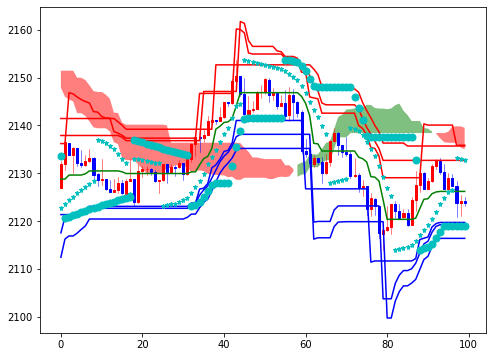

In [20]:
plot_size = 100


#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols



#         do plot       #
plot_df = res_df.iloc[-plot_size:, input_cols]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# fig.show()
# fig.canvas.draw()

temp_ohlc = plot_df.values[:, :4]
index = np.arange(len(temp_ohlc))
candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

# print(plot_df.values[:, 4:])
plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)



plt.show()
# plt.draw()
plt.close()
# plt.pause(1e-3)

### pr check with strategy

#### basic strategy

In [22]:
org_res_df = res_df.copy()

##### shifting

In [26]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break   # if you want to use org_res_df, just break here


# shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3
shift_size = +1

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

                            open     high  ...    min_upper    max_lower
2021-06-30 23:55:59.999  2126.71  2129.99  ...  2132.690828  2119.698528
2021-06-30 23:56:59.999  2129.09  2129.80  ...  2132.690828  2119.698528
2021-06-30 23:57:59.999  2127.41  2128.29  ...  2132.690828  2119.698528
2021-06-30 23:58:59.999  2123.82  2125.43  ...  2132.690828  2119.698528
2021-06-30 23:59:59.999  2124.28  2125.00  ...  2132.690828  2119.698528

[5 rows x 37 columns]


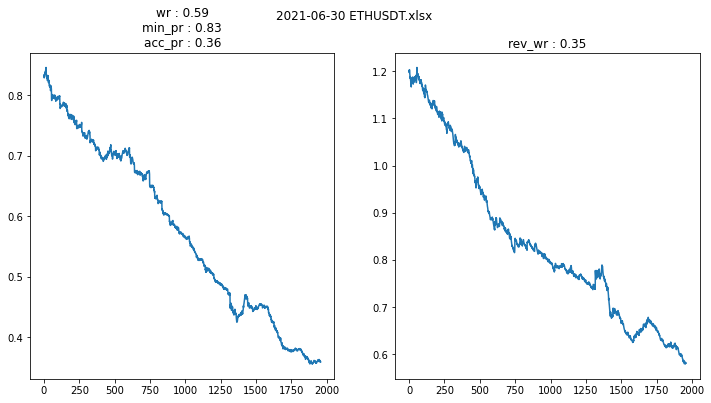

In [27]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
# gap = 0.0008
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)

#       1-1. entry condition = ep line touch + all color off 는 제외      #
#       short = -1     #
entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                                                    (res_df['minor_ST2_Trend'] == 1) & 
                                                  (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
#       long = 1     #
entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                                                    (res_df['minor_ST2_Trend'] == -1) & 
                                                  (res_df['minor_ST3_Trend'] == -1)), 1, entry)   

#       1-2. tp line = middle line 조금 이내         #
short_tp = res_df['middle_line'] * (1 + gap)
long_tp = res_df['middle_line'] * (1 - gap)

# print("short_tp.iloc[-10:] :", short_tp.iloc[-10:])
# break


#       trading       #

trade_list = []
pr_list = []

i = 0
while 1:
# for i in range(len(res_df)):

  if entry[i] == -1:

    for j in range(i + 1, len(res_df)):

      if res_df['low'].iloc[j] <= short_tp.iloc[j]:

        trade_list.append([i, j])
        temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
        pr_list.append(temp_pr)
        i = j
        break

  elif entry[i] == 1:

    for j in range(i + 1, len(res_df)):

      if res_df['high'].iloc[j] >= long_tp.iloc[j]:

        trade_list.append([i, j])
        temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
        pr_list.append(temp_pr)
        i = j
        break


  i += 1
  if i >= len(res_df):
    break



#     result analysis     #
plt.figure(figsize=(12, 6))
plt.suptitle(key)

np_pr = (np.array(pr_list) - 1) * lvrg + 1

total_pr = np.cumprod(np_pr)
wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

plt.subplot(121)
plt.plot(total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f" % (wr, np.min(np_pr), total_pr[-1]))
# plt.show()


#     reversion adjustment      #
rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
    
rev_total_pr = np.cumprod(rev_np_pr)
rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

plt.subplot(122)
plt.plot(rev_total_pr)
plt.title("rev_wr : %.2f" % rev_wr)
plt.show()

#   ------------------------------------------------  #

#       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

#       2-1. sl exit condition = [???]       #

#### ichimoku

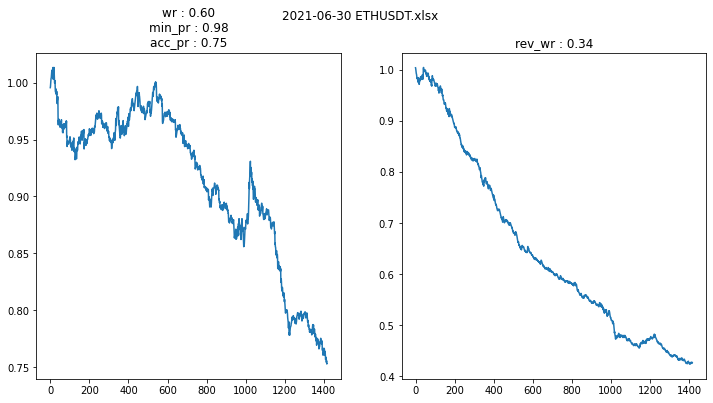

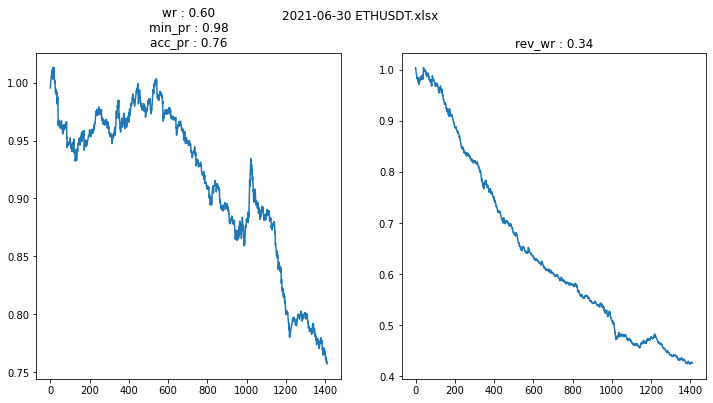

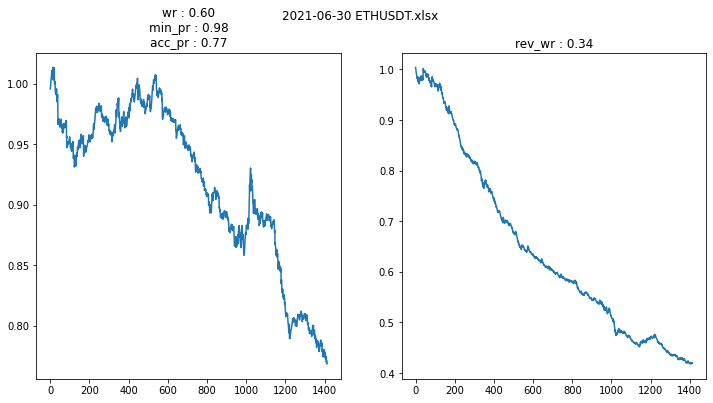

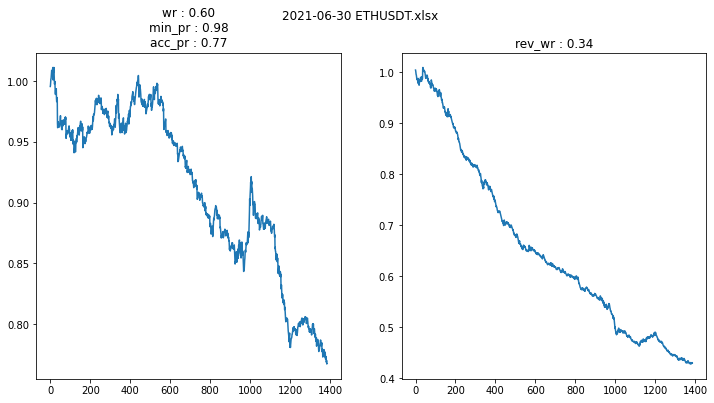

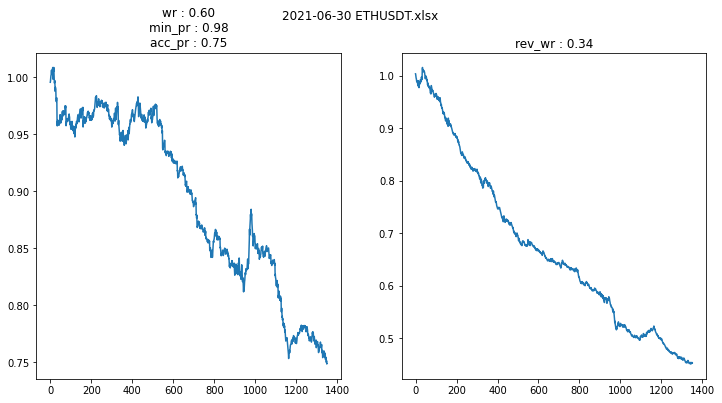

In [18]:
fee = 0.0004
lvrg = 1

# shift_size = -1
shift_size = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)



senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

  
  cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
  cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)


  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                                                      (res_df['minor_ST2_Trend'] == 1) & 
                                                    (res_df['minor_ST3_Trend'] == 1)) &
                  (res_df['close'].shift(shift_size) < cloud_top.shift(shift_size)), -1, 0)   
  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                                                      (res_df['minor_ST2_Trend'] == -1) & 
                                                    (res_df['minor_ST3_Trend'] == -1)) &
                  (res_df['close'].shift(shift_size) > cloud_bottom.shift(shift_size)), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break

    elif entry[i] == 1:

      for j in range(i + 1, len(res_df)):

        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break



  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f" % (wr, np.min(np_pr), total_pr[-1]))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("rev_wr : %.2f" % rev_wr)
  plt.show()

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

#### macd

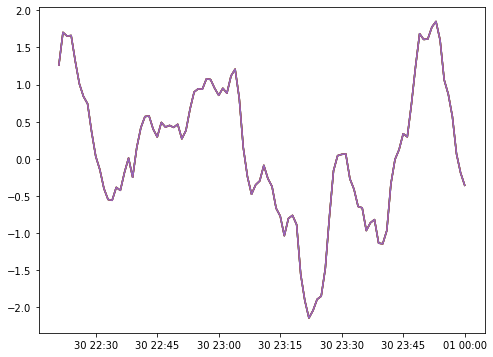

In [ ]:
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


plt.plot(res_df[macd_list].iloc[-100:])

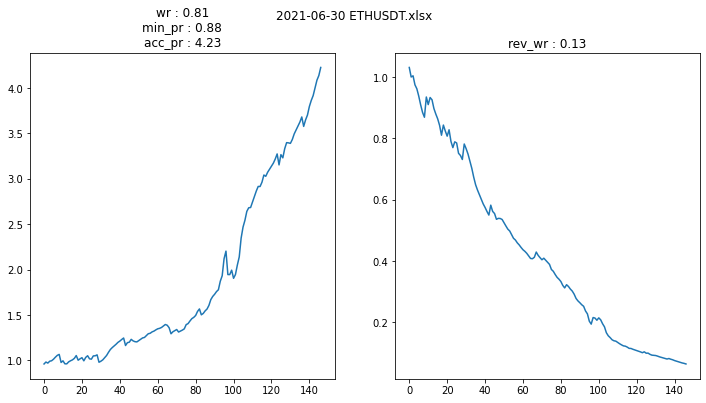

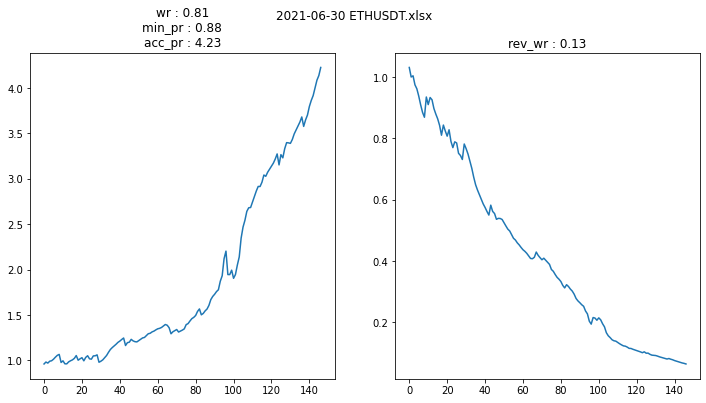

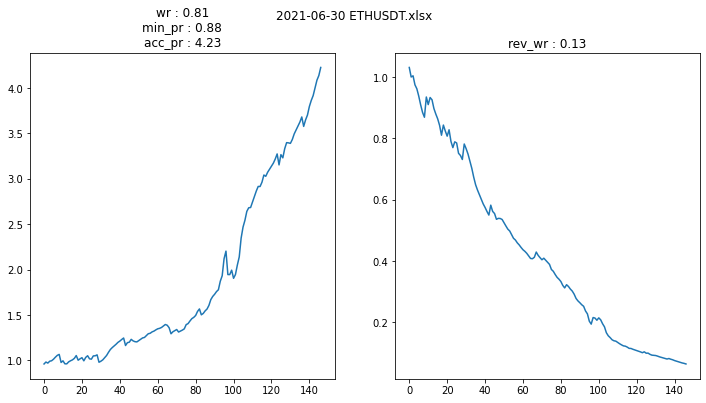

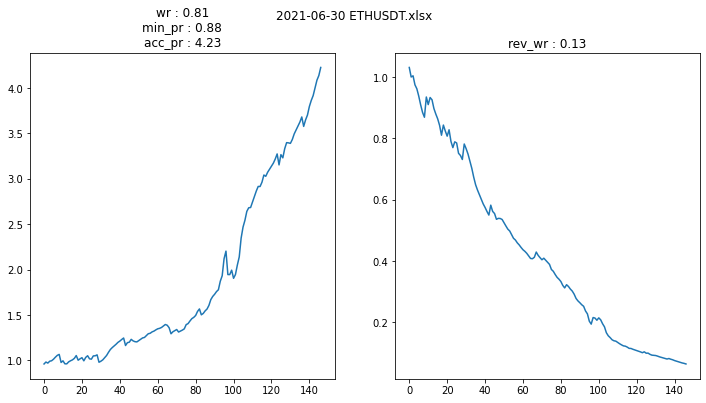

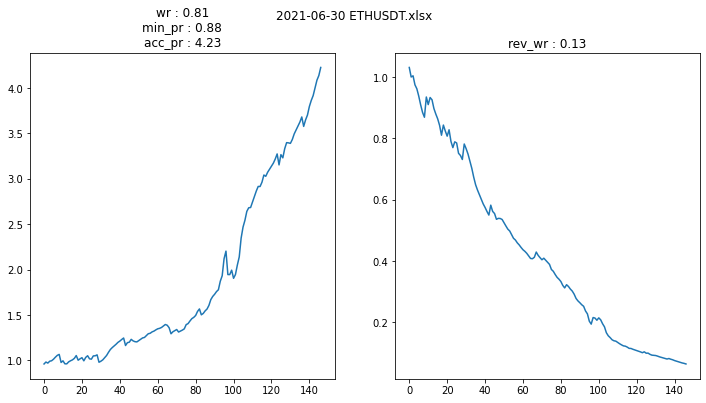

In [ ]:
fee = 0.0004
lvrg = 10

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']

for macd_hist in macd_list:

  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                                                      (res_df['minor_ST2_Trend'] == 1) & 
                                                    (res_df['minor_ST3_Trend'] == 1)) &
                  (res_df[macd_hist].shift(0) < 0), -1, 0)   
  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                                                      (res_df['minor_ST2_Trend'] == -1) & 
                                                    (res_df['minor_ST3_Trend'] == -1)) &
                  (res_df[macd_hist].shift(0) > 0), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break

    elif entry[i] == 1:

      for j in range(i + 1, len(res_df)):

        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break



  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f" % (wr, np.min(np_pr), total_pr[-1]))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("rev_wr : %.2f" % rev_wr)
  plt.show()

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

#### sar

In [ ]:
fee = 0.0004
lvrg = 10

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']

for macd_hist in macd_list:

  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                                                      (res_df['minor_ST2_Trend'] == 1) & 
                                                    (res_df['minor_ST3_Trend'] == 1)) &
                  (res_df[macd_hist].shift(0) < 0), -1, 0)   
  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                                                      (res_df['minor_ST2_Trend'] == -1) & 
                                                    (res_df['minor_ST3_Trend'] == -1)) &
                  (res_df[macd_hist].shift(0) > 0), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break

    elif entry[i] == 1:

      for j in range(i + 1, len(res_df)):

        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break



  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f" % (wr, np.min(np_pr), total_pr[-1]))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("rev_wr : %.2f" % rev_wr)
  plt.show()

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

#### half tp

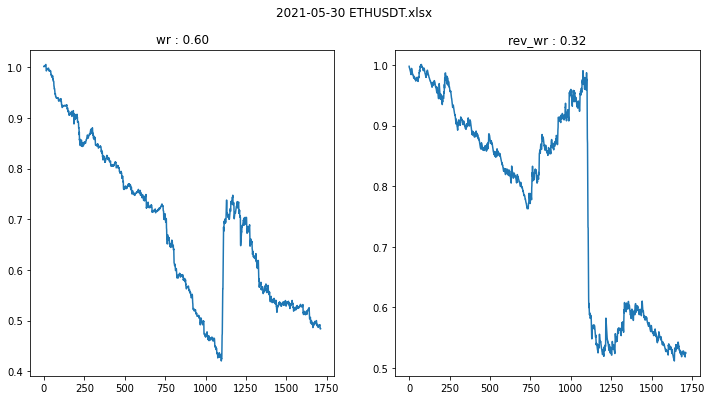

In [ ]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)

#       1-1. entry condition = ep line touch + all color off 는 제외      #
#       short = -1     #
entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                                                    (res_df['minor_ST2_Trend'] == 1) & 
                                                  (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
#       long = 1     #
entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                                                    (res_df['minor_ST2_Trend'] == -1) & 
                                                  (res_df['minor_ST3_Trend'] == -1)), 1, entry)   

#       1-2. tp line = middle line 조금 이내         #
short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


#       trading       #

trade_list = []
pr_list = []

i = 0
while 1:
# for i in range(len(res_df)):

  if entry[i] == -1:

    for j in range(i + 1, len(res_df)):

      if res_df['low'].iloc[j] <= short_tp.iloc[j]:

        trade_list.append([i, j])
        temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
        pr_list.append(temp_pr)
        i = j
        break

  elif entry[i] == 1:

    for j in range(i + 1, len(res_df)):

      if res_df['high'].iloc[j] >= long_tp.iloc[j]:

        trade_list.append([i, j])
        temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
        pr_list.append(temp_pr)
        i = j
        break


  i += 1
  if i >= len(res_df):
    break



#     result analysis     #
plt.figure(figsize=(12, 6))
plt.suptitle(key)

np_pr = (np.array(pr_list) - 1) * lvrg + 1

total_pr = np.cumprod(np_pr)
wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

plt.subplot(121)
plt.plot(total_pr)
plt.title("wr : %.2f" % wr)
# plt.show()


#     reversion adjustment      #
rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
    
rev_total_pr = np.cumprod(rev_np_pr)
rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

plt.subplot(122)
plt.plot(rev_total_pr)
plt.title("rev_wr : %.2f" % rev_wr)
plt.show()

#   ------------------------------------------------  #

#       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

#       2-1. sl exit condition = [???]       #


### traded section plot

#### plot with off-color st with dash

In [ ]:
prev_plotsize = 50

#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 16] # 15 ~ 19
ichimoku_cols = [22, 23]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] < 1.01:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]



  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle
  
  plt.plot(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.plot(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                    where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                    where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()



Output hidden; open in https://colab.research.google.com to view.

##### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


#### none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()